[-0.4       -0.j         12.1723872 -5.70961471j -6.49402066+4.11074325j
 -6.7223872 +1.82010984j  1.44402066+6.74642794j -0.4       -0.j
  1.44402066-6.74642794j -6.7223872 -1.82010984j -6.49402066-4.11074325j
 12.1723872 +5.70961471j]


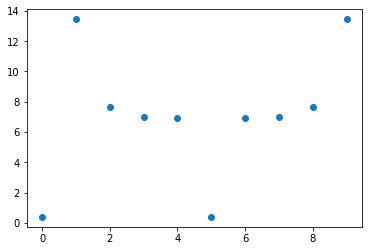

In [42]:
from scipy import fftpack
x = np.array([0.0, 0.5, 5.0, -0.2, -1.2, -2.1, -5.0, -1.2, 0.8, 3.0])
c = fftpack.fft(x)
print(c)

plt.plot(abs(c), "o")
plt.show()

<ipython-input-95-bf0133233f74>:52: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x','y', data=df, marker='o', color='g')


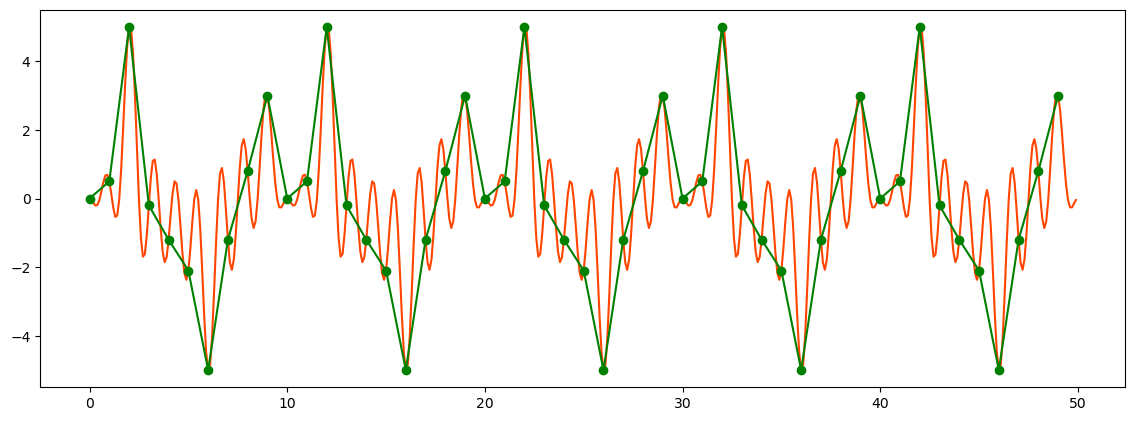

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

y = [0.0, 0.5, 5.0, -0.2, -1.2, -2.1, -5.0, -1.2, 0.8, 3.0,
     0.0, 0.5, 5.0, -0.2, -1.2, -2.1, -5.0, -1.2, 0.8, 3.0,
     0.0, 0.5, 5.0, -0.2, -1.2, -2.1, -5.0, -1.2, 0.8, 3.0,
     0.0, 0.5, 5.0, -0.2, -1.2, -2.1, -5.0, -1.2, 0.8, 3.0,
     0.0, 0.5, 5.0, -0.2, -1.2, -2.1, -5.0, -1.2, 0.8, 3.0] #y=[0.0, 0.5, 5.0, -0.2, -1.2, -2.1, -5.0, -1.2, 0.8, 3.0]

N = 500
#total of interpolated points
n = len(y)
r = range(0,n)

c = 0 
#lower bound of interval
d = n
#upper bound of interval

omega = complex(np.cos(-2*np.pi/n), np.sin(-2*np.pi/n))
ma = np.zeros((n,n), dtype = complex)
re = np.zeros((n,n))
im = np.zeros((n,n))
s = np.zeros((N))
t = np.zeros((N))

for row in range(0,n):
    for column in range(0,n):
        ma[row,column]=np.power(omega, row*column)
        re[row,column]=(1/np.sqrt(n))*ma[row,column].real
        im[row,column]=(1/np.sqrt(n))*ma[row,column].imag

a = np.matmul(re,y)
b = np.matmul(im,y).real

for i in range(0,N):
    t[i] = c+(i*(d-c)/N)
    for j in range(0,n):
        summa = 0
        for k in range(0,n):
            summa = summa+a[k]*np.cos(2*np.pi*k*(t[i]-d)/(d-c))-b[k]*np.sin(2*np.pi*k*(t[i]-d)/(d-c))
            s[i] = summa/np.sqrt(n)
            
plt.rcParams['figure.figsize'] = [14, 5]
plt.rcParams['figure.dpi'] = 100

df=pd.DataFrame({'x': range(0,n), 'y': y})
#plot of interpolation using Discrete Fourier Transform
plt.plot(t,s,color = 'orangered')
#plot of original data
plt.plot('x','y', data=df, marker='o', color='g')
plt.show()